Este colab fue desarrollado por Arnold Charry Armero

# The Lockbox Problem

C. Nickles recibe pagos con tarjeta de crédito de cuatro regiones del país (Oeste, Medio Oeste, Este y Sur). El valor diario promedio de los pagos enviados por correo por clientes desde
cada región es la siguiente: Occidente, 70.000 dólares; el Medio Oeste, 50.000 dólares; el Este, 60.000 dólares;
el Sur, 40.000 dólares. Nickles debe decidir dónde los clientes deben enviar sus pagos. Como Nickles puede ganar un interés anual del 20% invirtiendo estos ingresos, le gustaría
recibir pagos lo más rápido posible. Nickles está considerando establecer operaciones para
procesar pagos (a menudo denominados cajas de seguridad) en cuatro ciudades diferentes: Los Ángeles,
Chicago, Nueva York y Atlanta. El número promedio de días (desde el momento en que se envía el pago)
hasta que se liquide el cheque y Nickles pueda depositar el dinero depende de la ciudad a la que se
el pago se envía por correo, como se muestra en la Tabla 4. Por ejemplo, si se envía un cheque desde Occidente
a Atlanta, tomaría un promedio de 8 días antes de que Nickles pudiera ganar intereses sobre el
controlar. El costo anual de mantener una caja de seguridad en cualquier ciudad es de $50,000. Formule una IP que
Nickles se puede utilizar para minimizar la suma de los costos debido a la pérdida de intereses y las operaciones de caja de seguridad.
Supongamos que cada región debe enviar todo su dinero a una sola ciudad y que no hay límite
de la cantidad de dinero que cada caja de seguridad puede manejar.

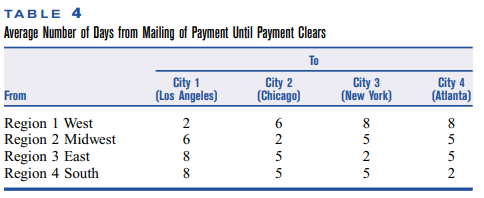

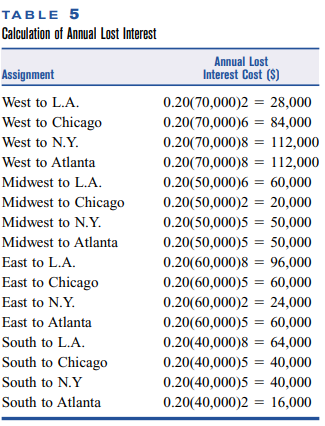

#Conjuntos

$ i = \text{Región indexada por } i$

$ j = \text{Ciudad indexada por } j$

#Parámetros

$ CP_{ij} = \textrm{Costo de pérdida la ciudad } j \textrm{ respecto a la región  } i$

$ CF_{j} = \textrm{Costo de fijo de instalar las operaciones en la ciudad } j$



## Variables de decisión

$ x_{ij} = \textrm{1 si la ciudad }j \textrm{ recibe envíos de la región }i, \textrm{ 0 lo contrario. }$

$ y_{j} = \textrm{1 si se instalan las operaciones en la ciudad }j, \textrm{ 0 lo contrario. } $

## Función Objetivo

$$ \textrm{Min } z =\sum_{j = 1}^{n}\sum_{i = 1}^{n}CP_{ij}\:x_{ij} + \sum_{i = 1}^{n}CF_{j}\:y_{j}$$

## Restricciones

Cada región debe de enviar a una ciudad solamente los envíos.

$$ \sum_{j = 1}^{n}x_{ij} = 1, \forall i $$

Si la ciudad $j$ no abre operaciones, no se pueden hacer envíos.

$$ x_{ij} \leq y_{j}, \forall i, \forall j $$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 24.2 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
región = range(4)
ciudad = range(4)

In [ ]:
#Parámetros

CP = [[28000, 84000, 112000, 112000],
      [60000, 20000, 50000, 50000],
      [96000, 60000, 24000, 60000],
      [64000, 40000, 40000, 16000]]

CF = [50000, 50000, 50000, 50000]

In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="The_Lockbox_Problem", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (región, ciudad), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (ciudad), 0, 1, LpInteger)

# Función objetivo
model +=  lpSum([[CP[i][j] * X[i][j] for i in región] for j in ciudad]) + lpSum([CF[j] * Y[j] for j in ciudad])


# Agregar las restricciones

for i in región:
  model += lpSum([X[i][j] for j in ciudad]) == 1

for i in región:
  for j in ciudad:
    model += X[i][j] <= Y[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0_0 = 1.0
X_0_1 = 0.0
X_0_2 = 0.0
X_0_3 = 0.0
X_1_0 = 0.0
X_1_1 = 0.0
X_1_2 = 1.0
X_1_3 = 0.0
X_2_0 = 0.0
X_2_1 = 0.0
X_2_2 = 1.0
X_2_3 = 0.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 1.0
X_3_3 = 0.0
Y_0 = 1.0
Y_1 = 0.0
Y_2 = 1.0
Y_3 = 0.0
Costos totales = $ 242000.0
